# IWIS - Test task

## Description:
- Given a train and test datastes - build a binary classififer which will predict whether or not a client's loan will be aproved or declined

- Data:
    - 9 anonimized features
    - Binary target - {1:loan declined, 0: loan aproved}
    
- Metrics:
    - ROC_AUC
    - Precision/Recall/F1

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

# set options
pd.options.display.max_rows = 150
pd.options.display.max_columns = None
plt.style.use('classic')
filterwarnings('ignore')

%matplotlib inline

In [8]:
!head data/train.csv 

==> data/train.csv <==
feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
0.0019632670000000003,42,0,0.079940785,1350,7,0,0,0,0,0
0.004538287,86,0,3.0, ,2,0,0,0, ,0
0.023044317,61,0,0.41991601700000003,5000,18,0,2,0,1,0
0.12124203300000001,48,0,0.526589364,2500,12,0,1,0,1,0
0.9999998999999999,49,3,0.256566684,5900,3,3,1,1,2,1
0.11378862099999999,68,1,0.005097373,7650,2,0,0,0,1,0
0.25476362399999997,39,0,0.360161138,11666,7,0,1,0,1,0
0.8725149659999999,47,0,2817.0, ,8,0,1,0,2,0
0.33855517,71,0,0.39728506799999996,14364,12,0,2,0,0,0
head: 5: No such file or directory


In [4]:
# set paths constants
PATH_TRAIN = 'data/train.csv'
PATH_TEST = 'data/train.csv'

### Get familiar with data
- load data
- calculate some stats
- check for nulls/duplicates
- check target distribution

In [5]:
# load data
df_train = pd.read_csv(PATH_TRAIN)

In [44]:
# check first 5 rows
df_train.head()

,feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
0,0.001963,42,0,0.079941,1350,7,0,0,0,0,0
1,0.004538,86,0,3.000000,,2,0,0,0,,0
2,0.023044,61,0,0.419916,5000,18,0,2,0,1,0
3,0.121242,48,0,0.526589,2500,12,0,1,0,1,0
4,1.000000,49,3,0.256567,5900,3,3,1,1,2,1


In [53]:
# check dtypes and null counts if exists
df_train.info(memory_usage = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73276 entries, 0 to 73275
Data columns (total 11 columns):
feature1    73276 non-null float64
age         73276 non-null int64
feature2    73276 non-null int64
feature3    73276 non-null float64
feature4    73276 non-null object
feature5    73276 non-null int64
feature6    73276 non-null int64
feature7    73276 non-null int64
feature8    73276 non-null int64
feature9    73276 non-null object
target      73276 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 6.1+ MB


In [51]:
# check if there is duplicated rows
df_train.duplicated().sum()

479

In [60]:
# show some statistics
df_train.describe(include = 'all')

,feature1,age,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,target
count,73276.000000,73276.000000,73276.000000,73276.000000,73276,73276.000000,73276.000000,73276.000000,73276.000000,73276,73276.000000
unique,NaN,NaN,NaN,NaN,9729,NaN,NaN,NaN,NaN,6,NaN
top,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,NaN,NaN,14462,NaN,NaN,NaN,NaN,42390,NaN
mean,0.319472,52.465910,0.246384,332.632474,NaN,8.459891,0.087109,0.992808,0.062381,NaN,0.066789
std,0.349851,14.423889,0.664956,1070.591318,NaN,4.866809,0.405338,0.985498,0.288855,NaN,0.249657
min,0.000000,29.000000,0.000000,0.004329,NaN,2.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.029748,41.000000,0.000000,0.174224,NaN,5.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,0.153913,52.000000,0.000000,0.364076,NaN,8.000000,0.000000,1.000000,0.000000,NaN,0.000000
75%,0.559585,63.000000,0.000000,0.857081,NaN,11.000000,0.000000,2.000000,0.000000,NaN,0.000000


In [59]:
# try to highlight categorical features based on number of unique occurencies in each feature 
df_train.nunique(axis = 0)

feature1    60592
age            59
feature2        5
feature3    57159
feature4     9729
feature5       23
feature6        4
feature7        5
feature8        3
feature9        6
target          2
dtype: int64

In [56]:
# check for target distribution
df_train.target.value_counts(normalize = True)

0    0.933211
1    0.066789
Name: target, dtype: float64

### Primary insights
- so there is 73276 object, not 9 but 10 features (9 anonimized and **age feature**) and **binary target**.
- there are **479 duplicated rows** 
- primary .info() **doesn't found any null values**, so I **need to dive deeper** to find if there is some other occurencies of null values
- there is some **issues with types of features**, which must be recasted to proper type.
- features have **different scales**, so in case of usage of classifiers based on linear (e.g. SVM(linear kernel)/LG) or distance (e.g. KNN) methods - features must be scaled to the same distribution
- based on target distribution - this is **imbalanced-classification** problem so additional methods of over/under-sampling technique like SMOTE may be applied in case of classifier's improvement
- I found out that there is **6 categorical features** (some of them may be ranked features) and 4 numerical feature 

### Exploratory Data Analysis

In [61]:
y = 'target'

cat_features = [
    'feature2',
    'feature5',
    'feature6',
    'feature7',
    'feature8',
    'feature9'
]

(array([31492.,  8446.,  5387.,  4211.,  3550.,  2976.,  2565.,  2337.,
         2468.,  9844.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

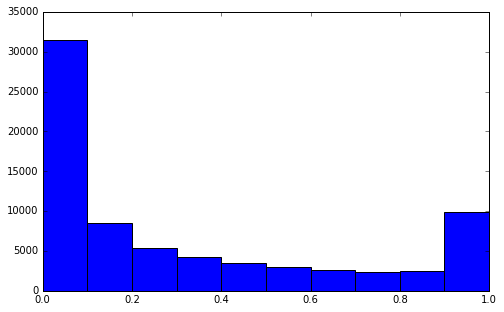

In [66]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.hist(df_train['feature1'], color = )